<a href="https://colab.research.google.com/github/Sibahle01/Mastering-NumPy-Real-South-African-Data-Analysis-Python-Tutorial/blob/main/NumPy_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##NumPy Defination
NumPy (Numerical Python) is a powerful library in Python used for working with arrays and performing mathematical operations on them. It provides tools to handle large datasets efficiently, including support for multi-dimensional arrays, along with mathematical functions like addition, subtraction, multiplication, and more. It is widely used for tasks in data science, machine learning, and scientific computing.

##1. Speed!

In [25]:
import time
import numpy as np


size = 1_000_000
py_list = list(range(size))
np_array = np.array(range(size))

start = time.time()
py_result = [x * 2 for x in py_list]
py_time = time.time() - start

start = time.time()
np_result = np_array * 2
np_time = time.time() - start

print(f"Python list: {py_time:.6f} seconds")
print(f"Numpy array: {np_time:.6f} seconds")
print(f"Numpy is {py_time / np_time:.1f}x faster")

Python list: 0.070698 seconds
Numpy array: 0.002191 seconds
Numpy is 32.3x faster


##2. Less Code

In [26]:
my_list = [1, 2, 3, 4, 5]
total = 0
for item in my_list:
    total += item
print(total)


import numpy as np
my_array = np.array([1, 2, 3, 4, 5])
print(my_array.sum())

15
15


##3. More Features

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

print("Loading out South African rainfall data...")
data = pd.read_csv("/content/drive/MyDrive/sa_rainfall_data_improved.csv")
data.head

stations = data["Station"].values
print("Our weather stations: ")
for station in stations:
    print(station)

rainfall = data.iloc[:,1:].to_numpy()
print(rainfall.shape)


Loading out South African rainfall data...
Our weather stations: 
Cape Town
Johannesburg
Durban
Bloemfontein
Port Elizabeth
(5, 60)


In [16]:
avarage_rainfall = np.mean(rainfall)
print(f"\nAverage rainfall: {avarage_rainfall:.2f} mm")

total_by_station = np.sum(rainfall, axis=1)

max_station_index = np.argmax(total_by_station)
print(f"Wetter location: {stations[max_station_index]}")

min_station_index = np.argmin(total_by_station)
print(f"Dryest location: {stations[min_station_index]}")



Average rainfall: 88.55 mm
Wetter location: Durban
Dryest location: Bloemfontein


In [18]:
monthly_avg = np.mean(rainfall.reshape(-1,12), axis = 0)
months = ["Jan", "Fab", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

print("\nAvarage rainfall across South Africa for each month: ")
for i, month in enumerate(months):
    print(f"{month}: {monthly_avg[i]:.2f} mm")

summer_months = [11, 0, 1]
winter_months = [5,6,7]

summer_rainfall = np.mean(rainfall[:, summer_months])
winter_rainfall = np.mean(rainfall[:, winter_months])

print(f"\nAverage rainfall in summer: {summer_rainfall:.2f} mm")
print(f"Average rainfall in winter: {winter_rainfall:.2f} mm")


Avarage rainfall across South Africa for each month: 
Jan: 98.16 mm
Fab: 107.52 mm
Mar: 118.60 mm
Apr: 88.96 mm
May: 74.52 mm
Jun: 64.00 mm
Jul: 64.72 mm
Aug: 70.56 mm
Sep: 73.00 mm
Oct: 93.04 mm
Nov: 100.56 mm
Dec: 108.96 mm

Average rainfall in summer: 103.60 mm
Average rainfall in winter: 65.40 mm


In [23]:
rought_threshold = 10
drought_months = np.sum(rainfall < drought_threshold, axis=1)

drought_indices = np.argsort(-drought_months)

print("\nDrought vulnerability by location (months with <10mm rain over 5 years):")
for i in drought_indices[:3]:
    print(f"{stations[i]}: {drought_months[i]} months")


Drought vulnerability by location (months with <10mm rain over 5 years):
Bloemfontein: 10 months
Johannesburg: 4 months
Cape Town: 0 months


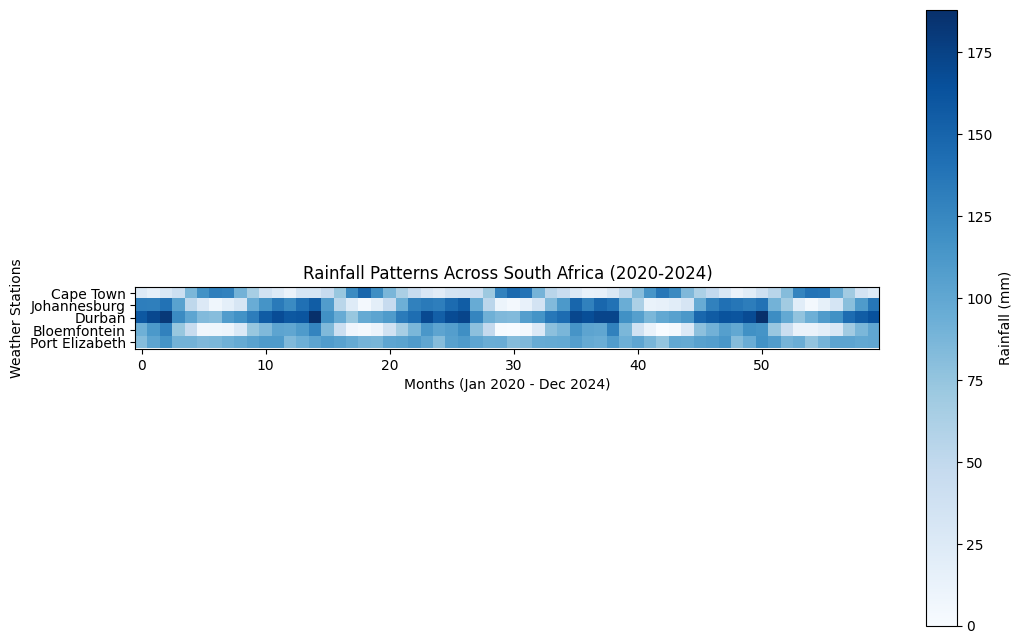

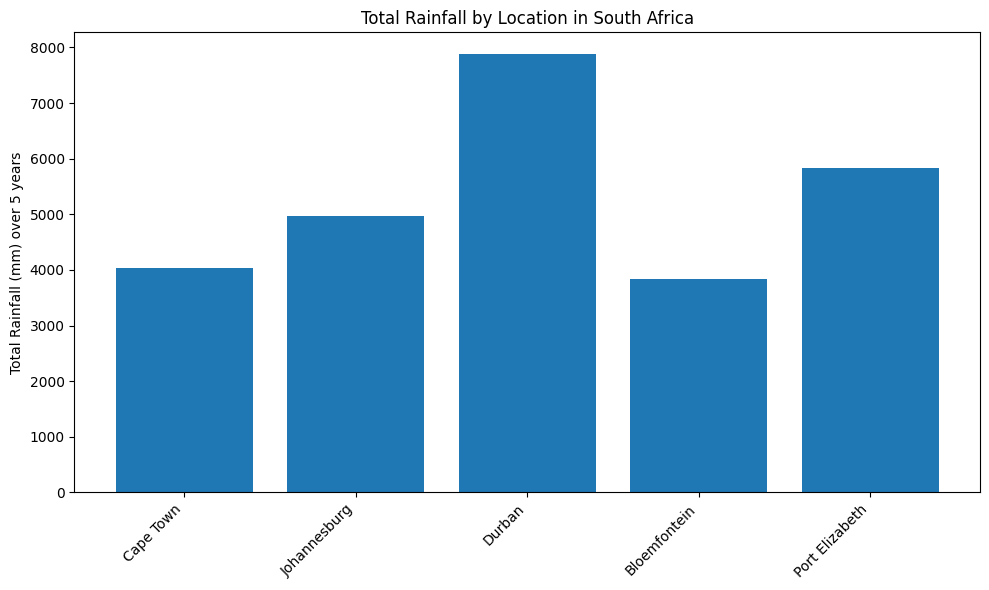

In [24]:
plt.figure(figsize=(12, 8))
plt.imshow(rainfall, cmap='Blues')
plt.colorbar(label='Rainfall (mm)')
plt.title('Rainfall Patterns Across South Africa (2020-2024)')
plt.xlabel('Months (Jan 2020 - Dec 2024)')
plt.ylabel('Weather Stations')
plt.yticks(range(len(stations)), [s.split(' (')[0] for s in stations])
plt.show()

plt.figure(figsize=(10, 6))
station_names = [s.split(' (')[0] for s in stations]
plt.bar(station_names, total_by_station)
plt.xticks(rotation=45, ha='right')
plt.ylabel('Total Rainfall (mm) over 5 years')
plt.title('Total Rainfall by Location in South Africa')
plt.tight_layout()
plt.show()